<a href="https://colab.research.google.com/github/Vincentlee777/Programming_assignment/blob/main/Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-27 11:01:04--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-27 11:01:06--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  42.5MB/s    in 27s     

2023-05-27 11:01:33 (30.

In [15]:
#Import the module
import sqlite3 

In [17]:
#Make a connection to database
conn = sqlite3.connect("enron.db") 

In [18]:
#Create a cursor object
cur = conn.cursor()

In [19]:
#Look at the schema of database
sql = """
SELECT name
FROM sqlite_master
WHERE type ='table';
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [20]:
#Check the schema of table message using PRAGMA
sql = """
PRAGMA table_info('message');
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [21]:
#Check the schema of table employeelist using PRAGMA
sql = """
PRAGMA table_info('employeelist');
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [22]:
#Check the schema of table recieptinfo using PRAGMA
sql = """
PRAGMA table_info('recipientinfo');
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [23]:
#Check the schema of table referenceinfo using PRAGMA
sql = """
PRAGMA table_info('referenceinfo');
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

# **Question 1: Email Traffic Over Time (Days, Weeks, Months)**

In [24]:
#To obtain all data from the table message
sql = """
SELECT date
FROM message
"""

#Execute the above sql
cur.execute(sql)
cur.fetchone()

('2000-01-21 04:51:00',)

In [25]:
#Using pandas library to read database
import pandas as pd

#Used to display all information from the table
sql='''
SELECT * from message;
'''
#Load the data into a DataFrame
message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [26]:
#Check for any null values in the message table
message_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252759 entries, 0 to 252758
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mid         252759 non-null  int64 
 1   sender      252759 non-null  object
 2   date        252759 non-null  object
 3   message_id  252759 non-null  object
 4   subject     252759 non-null  object
 5   body        252759 non-null  object
 6   folder      252759 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.5+ MB


In [27]:
#Email Traffic Over Time (days)
sql = """
SELECT strftime('%Y-%m-%d', date) AS emails_per_day, COUNT(*) AS total_emails_days
FROM message
GROUP BY emails_per_day;
"""

#Execute the above sql
cur.execute(sql)
cur.fetchone()

#The dataframe for the results for (days)
date_df = pd.read_sql_query(sql, conn)
date_df

,emails_per_day,total_emails_days
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
1318,2020-12-24,1
1319,2020-12-29,1
1320,2043-12-28,1
1321,2044-01-02,1


In [ ]:
#Email Traffic Over Time (weeks)
sql = """
SELECT strftime('%Y-%w', date) AS emails_per_week, COUNT(1) AS total_emails_weeks
FROM message
GROUP BY emails_per_week;
"""

#Execute the above sql
cur.execute(sql)
cur.fetchone()

#The dataframe for the results for (weeks)
week_df = pd.read_sql_query(sql, conn)
week_df

,emails_per_week,total_emails_weeks
0,0001-0,4
1,0001-1,72
2,0001-2,39
3,0001-3,27
4,0001-4,31
5,0001-5,31
6,0001-6,1
7,0002-1,9
8,0002-2,14
9,0002-3,6


In [ ]:
#Email Traffic Over Time (months)
sql = """
SELECT strftime('%Y-%m', date) AS emails_per_month, COUNT(1) AS total_emails_months
FROM message
GROUP BY emails_per_month;
"""

#Execute the above sql
cur.execute(sql)
cur.fetchone()

#The dataframe for the results for (months)
month_df = pd.read_sql_query(sql, conn)
month_df

,emails_per_month,total_emails_months
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,12
4,0001-09,9
...,...,...
63,2004-02,53
64,2007-02,1
65,2020-12,2
66,2043-12,1


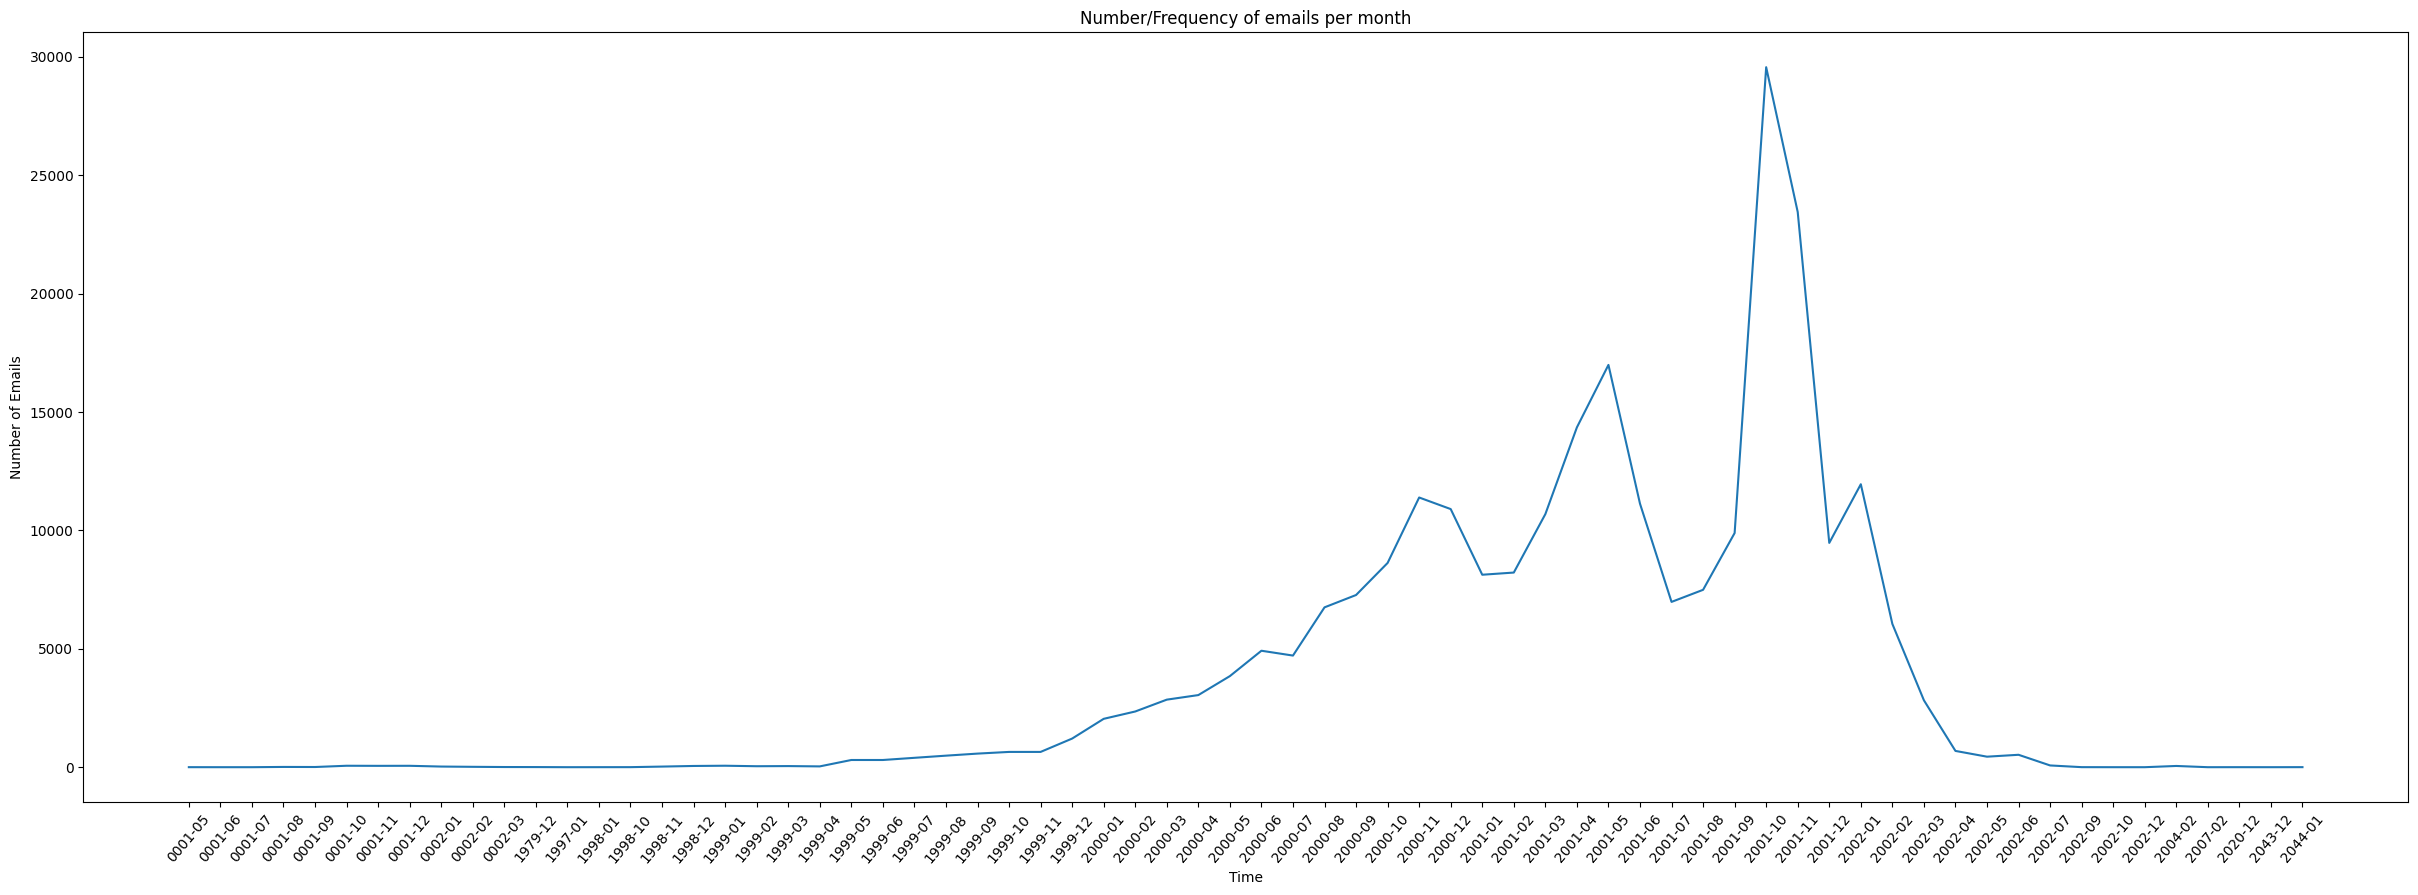

In [ ]:
#This is to import the seaborn and matplotlib libraries to use for the graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Used to set the figure size of the graph below
fig, ax = plt.subplots(figsize=(30, 10))

#To create the time series line chart
sns.lineplot(data=month_df, x='emails_per_month', y='total_emails_months', ax=ax)

#This is to create labels needed for the graph
ax.set_xlabel('Time')
ax.set_ylabel('Number of Emails')
ax.set_title('Number/Frequency of emails per month')

#This is used to make the labels for the x-axis more readable
plt.xticks(rotation=50)

#Creates the graph 
plt.show()

#create analysis for above work 


# **Question 2: Top Senders and Recipients**

In [28]:
#Top Senders and Recipients
sql='''
SELECT * from recipientinfo;
'''

#Stores the data from the sql above into a dataframe
recieved_df = pd.read_sql_query(sql, conn)
recieved_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [29]:
#This checks for any null values
recieved_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064442 entries, 0 to 2064441
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   rid     int64 
 1   mid     int64 
 2   rtype   object
 3   rvalue  object
 4   dater   object
dtypes: int64(2), object(3)
memory usage: 78.8+ MB


In [ ]:
#Used as reference for code below 
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
#Most frequent sender in message table
sql = """
SELECT sender, COUNT(1) AS counter
FROM message
GROUP BY sender
ORDER BY counter DESC;
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

#Stores the data from the sql above into a dataframe
sender_df = pd.read_sql_query(sql, conn)
sender_df

,sender,counter
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
...,...,...
17522,zoltan.trizna@ttmc.ttuhsc.edu,1
17523,zou.cherry@travelpark.com,1
17524,zrzic@mail.pt,1
17525,ztrizna@pol.net,1


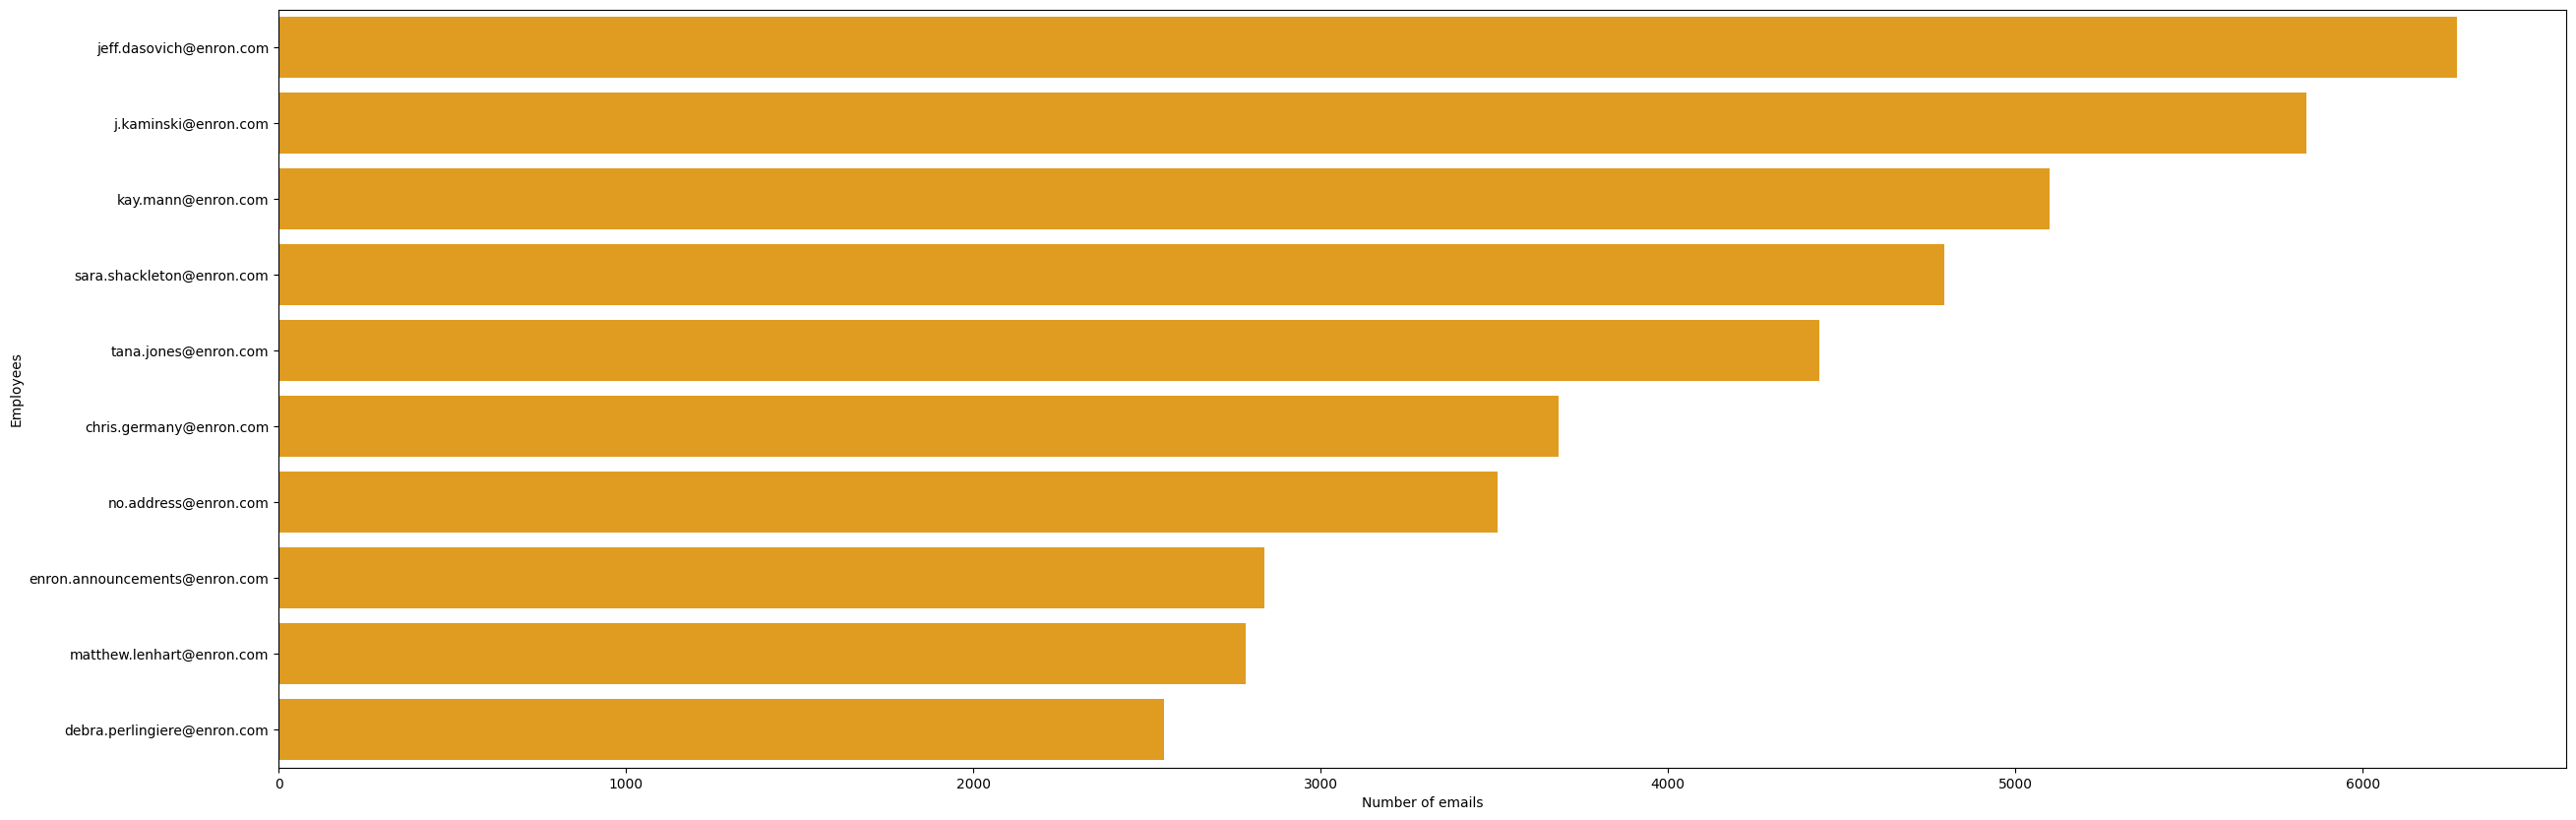

In [ ]:
#Used to import the seaborn and matplotlib libraries
import matplotlib.pyplot as plt
import seaborn as sns

#USed to set the figure size of the graph
plt.figure(figsize=(30, 10))

#Plot the horizontal bar chart for the sender and sets a limit of 10 for the data used 
sns.barplot(data=sender_df.nlargest(10, 'counter'), y='sender', x='counter', color='orange')
plt.xlabel('Number of emails')
plt.ylabel('Employees')

#Display the chart created
plt.show()

In [45]:
#Most frequent recievers of emails
sql = """
SELECT rvalue, COUNT(1) AS number
FROM recipientinfo
GROUP BY rvalue
ORDER BY number DESC;
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

#Stores the data from the sql above into a dataframe
reciever_df = pd.read_sql_query(sql, conn)
reciever_df

,rvalue,number
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
...,...,...
68079,zvon@enron.com,1
68080,zyft02@yahoo.com,1
68081,zyhorie.allyson@enron.com,1
68082,zykorie.allyson@enron.com,1


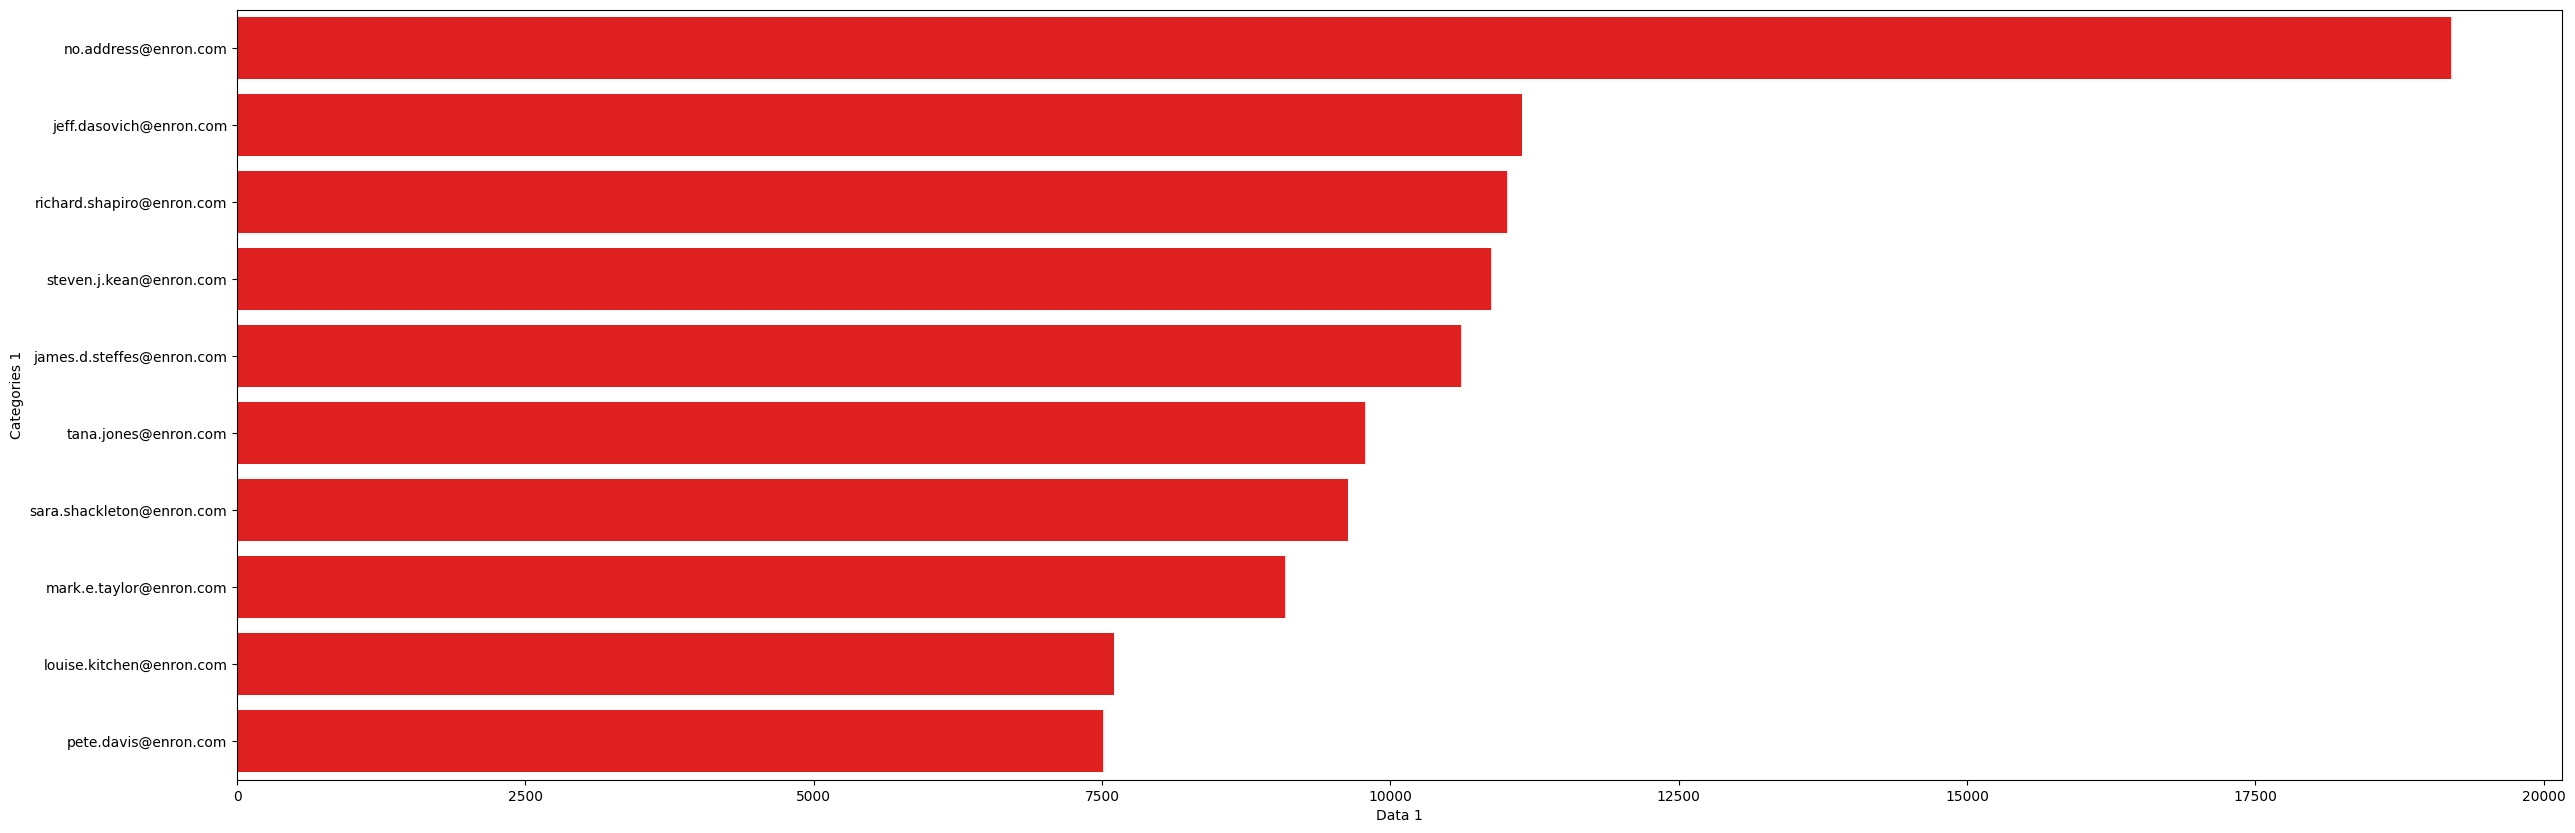

In [ ]:
#Used to import the seaborn and matplotlib libraries
import matplotlib.pyplot as plt
import seaborn as sns

#USed to set the figure size of the chart
plt.figure(figsize=(30, 10))

#Used to plot the horizontal bar chart for the reciever and sets a limit of 10 for the data used 
sns.barplot(data=reciever_df.nlargest(10, 'number'), y='rvalue', x='number', color='red')
plt.xlabel('Data 1')
plt.ylabel('Categories 1')

#Creates the chart 
plt.show()

#create analysis of above info 

# **Question 3: Email Distribution by Recipient Type**

In [ ]:
#The code is used to filter the rquired results
sql = """
SELECT rtype, COUNT(1) AS total_values
FROM Recipientinfo
GROUP BY rtype
ORDER BY rtype DESC;
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

#Stores the data from the sql above into a dataframe
filter_df = pd.read_sql_query(sql, conn)
filter_df

,rtype,total_values
0,TO,1556994
1,CC,253735
2,BCC,253713


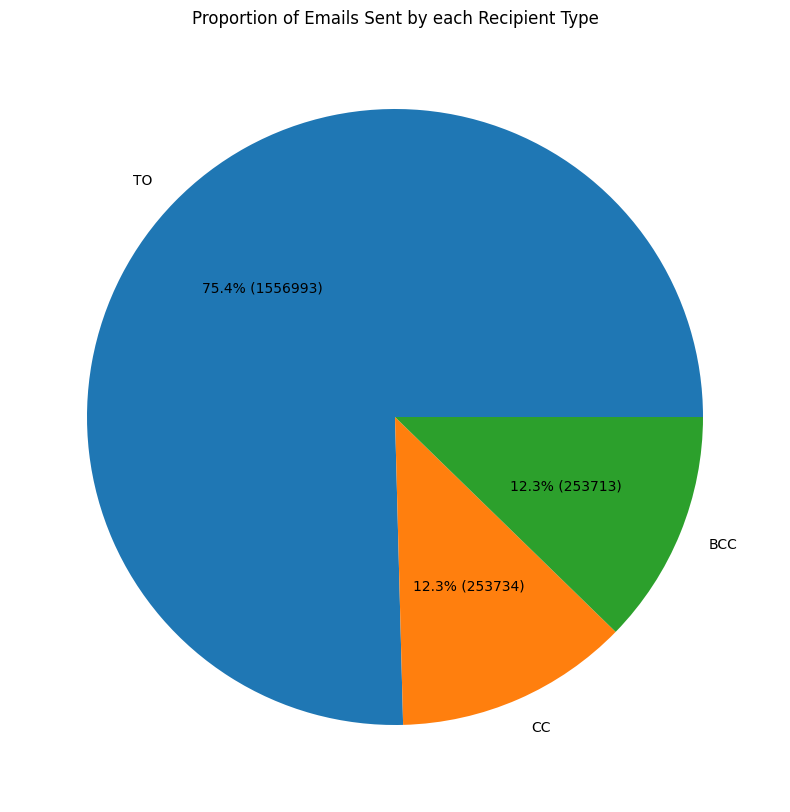

In [ ]:
#Used to import the seaborn and matplotlib libraries
import matplotlib.pyplot as plt

#Used to calculate total emails 
total_count = filter_df['total_values'].sum()

#This sets the figure size for the pie chart 
plt.figure(figsize=(10, 10))

#This code is used to create the pie chart. It uses both the total and percentage of emails from the values given 
plt.pie(filter_df['total_values'], labels=filter_df['rtype'], autopct=lambda pct: f'{pct:.1f}% ({int(pct*total_count/100)})')

#This gives the title
plt.title('Proportion of Emails Sent by each Recipient Type')

#This displays the pie chart 
plt.show()

#create analysis of above info 

# **Question 4: Subject Keyword Analysis**

In [ ]:
#Subject Keyword Analysis
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
#This code is used to find all possible keywrods used and their frequency 
sql = """
SELECT subject, COUNT(*) AS total
FROM message
WHERE subject != ''
GROUP BY subject
ORDER BY total DESC;
"""

#Execute the above sql
cur.execute(sql)
cur.fetchall()

#Stores the data from the sql above into a dataframe
keywords_df = pd.read_sql_query(sql, conn)
keywords_df

,subject,total
0,RE:,3724
1,Re:,2513
2,Demand Ken Lay Donate Proceeds from Enron Stoc...,1123
3,FW:,738
4,Enron Mentions,524
...,...,...
140791,"""ANNOUNCING"" a market that is Virtually UNTAPP...",1
140792,"""ANNOUNCING"" a market that is Virtually UNTAPP...",1
140793,"""ANNOUNCING"" A market that is Virtually UNTAPP...",1
140794,"""100 Years of Energy"" - ABC Channel 13",1


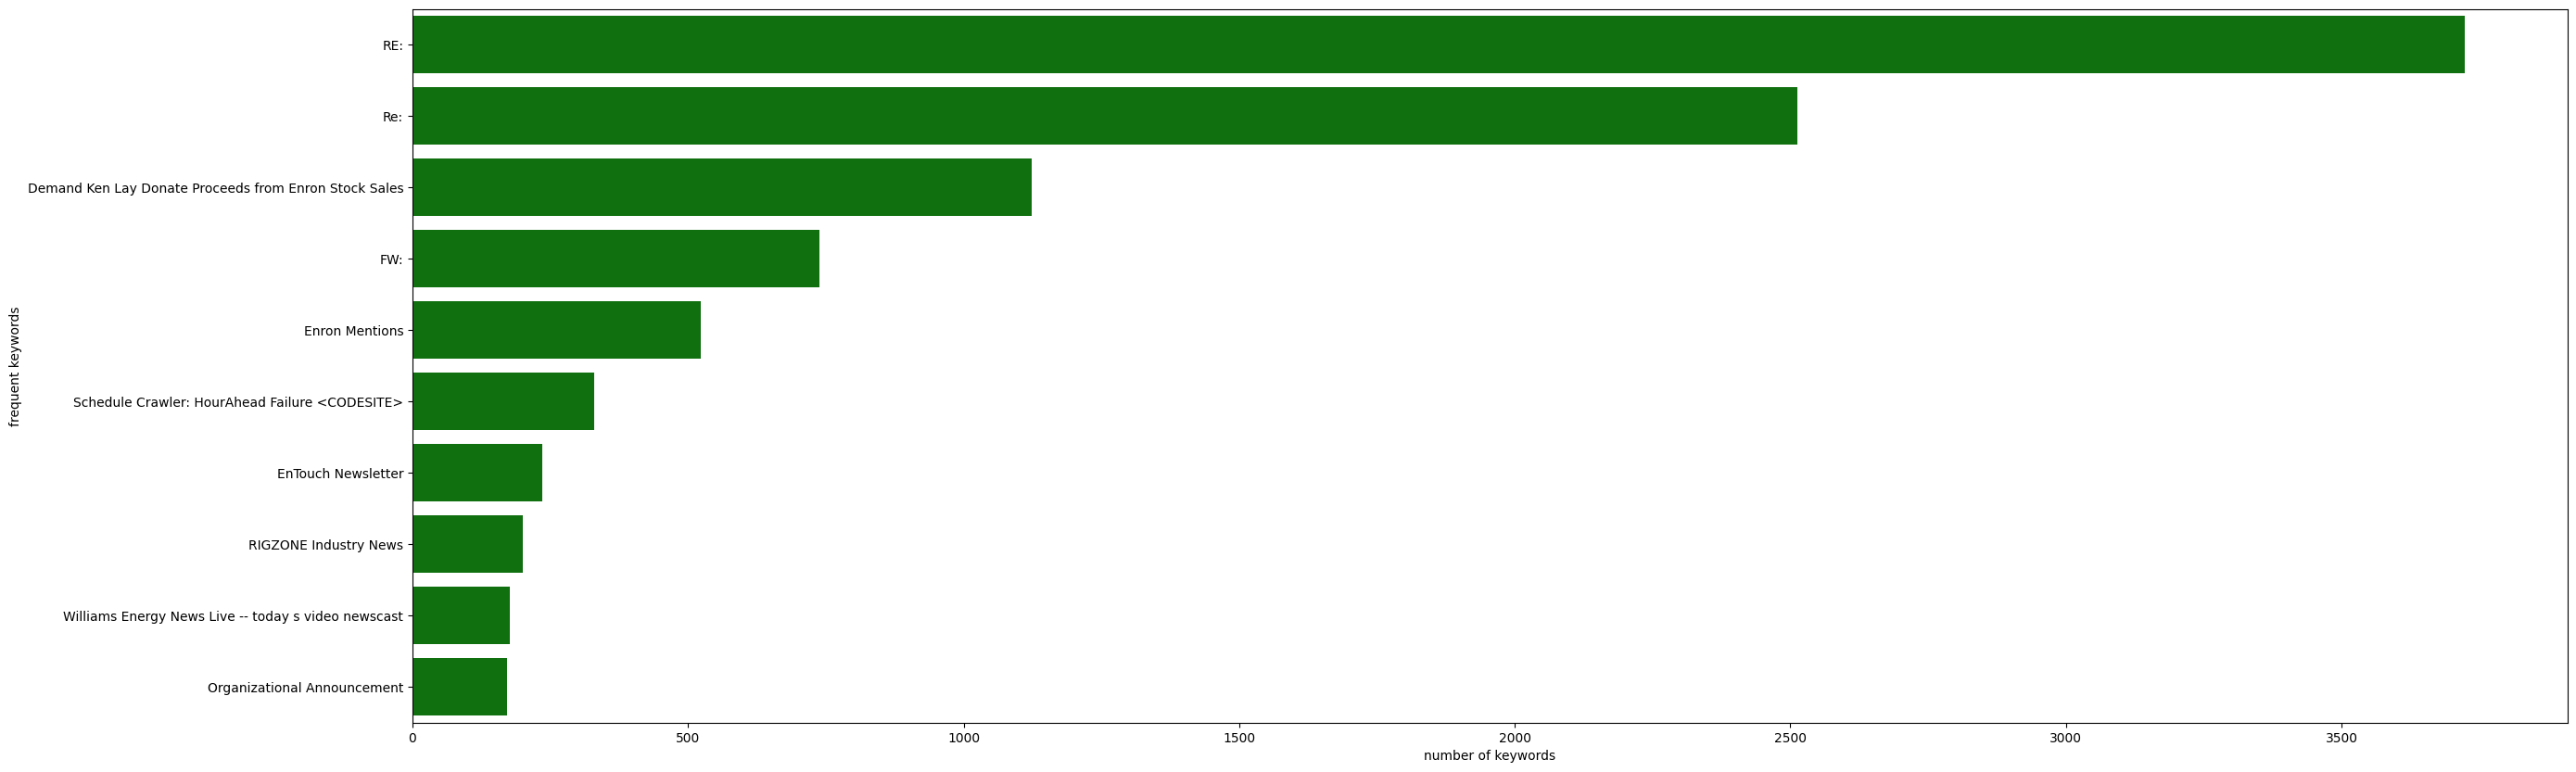

In [ ]:
#Used to import the seaborn and matplotlib libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Used to set figure size of graph 
plt.figure(figsize=(30, 10))

#Used to plot the horizontal bar chart for the most frequent keywords and sets a limit of 10 for the data used 
sns.barplot(data=keywords_df.nlargest(10, 'total'), y='subject', x='total', color='green')
plt.xlabel('number of keywords')
plt.ylabel('frequent keywords')

#Creates the chart 
plt.show()

#create analysis of above info 

# **Question 5: Internal vs. External Communication**

In [30]:
#Used as reference to write code below 
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [31]:
#Used as reference to write code below 
recieved_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


In [32]:
#This displays all information from table employeelist 
sql='''
SELECT * from employeelist;
'''

#Stores the data from the sql above into a dataframe
employee_df = pd.read_sql_query(sql, conn)
employee_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [53]:
#This code gets the record, uses a count to determine if internal(1) or external(0) then stores it in the table final
sql = """
SELECT ComType , COUNT(1) AS Number FROM
(
SELECT * , 
  CASE
   WHEN (select COUNT(1) FROM employeelist WHERE employeelist.email_id = Recipientinfo.rvalue) = 1 THEN 'Internal'
  ELSE 'External'
  END AS ComType
FROM Recipientinfo 
) AS final
GROUP BY ComType
"""

##Stores the data from the sql above into a dataframe
cur.execute(sql)
cur.fetchall()

#Stores the data from the sql above into a dataframe
communication_df = pd.read_sql_query(sql, conn)
communication_df

,ComType,Number
0,External,1703208
1,Internal,361234


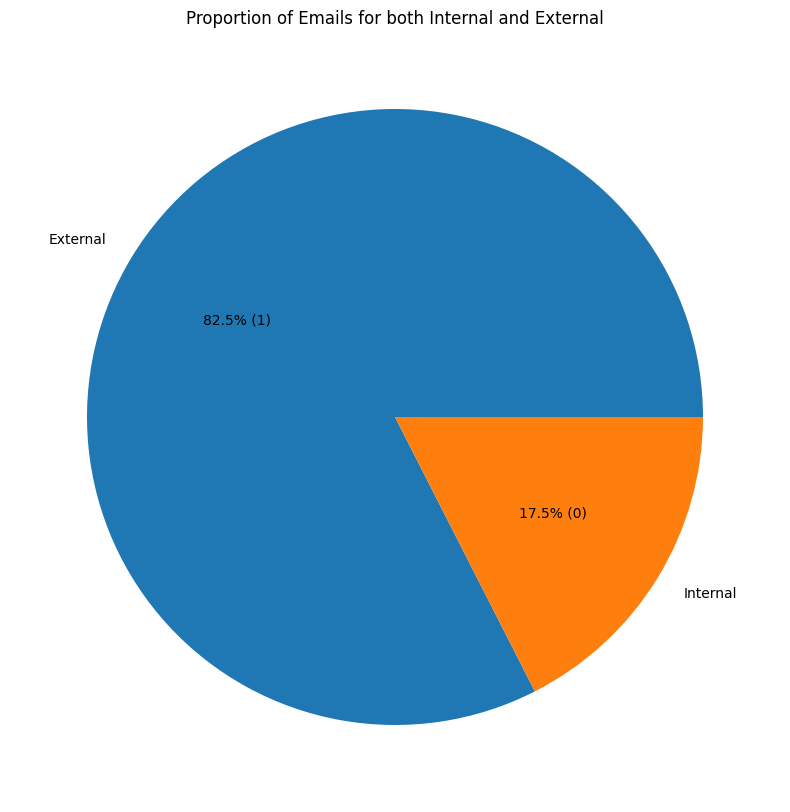

In [51]:
#Used to import the seaborn and matplotlib libraries
import matplotlib.pyplot as plt

#Used to calculate total communications made internal/external 
total_count = communication_df['Number'].count()

#This sets the figure size for the pie chart 
plt.figure(figsize=(10, 10))

#This code is used to create the pie chart. It uses both the total and percentage of emails that have been sent between internal and external communications 
plt.pie(communication_df['Number'], labels=communication_df['ComType'], autopct=lambda pct: f'{pct:.1f}% ({int(pct*total_count/100)})')

#This gives the title
plt.title('Proportion of Emails for both Internal and External')

#This displays the pie chart 
plt.show()